### Audit Risk ML Modelling -
by E E Ajaegbu 

Goal:The goal is to help the auditors by building a classification model
 that can predict the fraudulent firm on the basis of the present and historical risk factors.
 
Data: Exhaustive one year non-confidential data in the year 2015 to 2016 of firms is collected 

Source: Nishtha Hooda, CSED, TIET, Patiala

LinK: https://archive.ics.uci.edu/ml/datasets/Audit+Data

#### Load the Libraries 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import streamlit as st

#### Load the dataset

In [2]:
data =  pd.read_csv("audit_risk.csv")
data.head(10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,...,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0
6,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,...,0.4,0,0.2,0.0,3.2,31.774,0.4,0.5,6.3548,1
7,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,...,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1
8,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,...,0.4,0,0.2,0.0,4.2,17.206,0.4,0.5,3.4412,1
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0


In [3]:
#### Checking for basic information about the data- Missing values etc.

print(data.info()) # The format of each varaibles 
data.isnull().sum() # Checking for missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [4]:
data.describe().loc[:,["Score_A","Score_B","Score_MV","District_Loss","RiSk_E","Score","CONTROL_RISK","Risk"]]

,Score_A,Score_B,Score_MV,District_Loss,RiSk_E,Score,CONTROL_RISK,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,0.351289,0.313144,0.290979,2.505155,0.519072,2.702577,0.572680,0.393041
std,0.174055,0.169804,0.159745,1.228678,0.290312,0.858923,0.444581,0.488741
min,0.200000,0.200000,0.200000,2.000000,0.400000,2.000000,0.400000,0.000000
25%,0.200000,0.200000,0.200000,2.000000,0.400000,2.000000,0.400000,0.000000
50%,0.200000,0.200000,0.200000,2.000000,0.400000,2.400000,0.400000,0.000000
75%,0.600000,0.400000,0.400000,2.000000,0.400000,3.250000,0.400000,1.000000
max,0.600000,0.600000,0.600000,6.000000,2.400000,5.200000,5.800000,1.000000


#### Data Preprocessing -
Dropping Irrelevant varaibles and making the data suitable for machine learning Modelling 

In [5]:
### Looking for Linear Releationships and Correlation- Association among the variables 
data.corr()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.000000,-0.216824,-0.425198,-0.219025,-0.132670,-0.218967,-0.130589,-0.153316,-0.151840,-0.170404,...,-0.128546,-0.114798,-0.136900,-0.103223,-0.337326,-0.173278,-0.154950,NaN,-0.091954,-0.394131
PARA_A,-0.216824,1.000000,0.496680,0.999267,0.161940,0.358550,0.161834,0.267042,0.133786,0.140648,...,0.118941,0.118279,0.172635,0.103981,0.426659,0.481859,0.149198,NaN,0.219759,0.378758
Score_A,-0.425198,0.496680,1.000000,0.504878,0.249438,0.572655,0.248188,0.297547,0.242692,0.274594,...,0.102677,0.177932,0.265322,0.150925,0.720488,0.320920,0.170872,NaN,0.201847,0.619726
Risk_A,-0.219025,0.999267,0.504878,1.000000,0.165287,0.362971,0.165143,0.270223,0.135613,0.143103,...,0.118641,0.121132,0.176159,0.106561,0.432505,0.483291,0.150778,NaN,0.221581,0.385067
PARA_B,-0.132670,0.161940,0.249438,0.165287,1.000000,0.347568,0.999936,0.994100,0.209855,0.230851,...,0.079393,0.203582,0.316541,0.196048,0.397155,0.654453,0.186709,NaN,0.887794,0.257029
Score_B,-0.218967,0.358550,0.572655,0.362971,0.347568,1.000000,0.348152,0.379336,0.277576,0.313798,...,0.015324,0.200841,0.309505,0.171271,0.901276,0.365662,0.127827,NaN,0.207975,0.635768
Risk_B,-0.130589,0.161834,0.248188,0.165143,0.999936,0.348152,1.000000,0.994023,0.209596,0.230547,...,0.079731,0.202823,0.316375,0.195292,0.396947,0.654505,0.186409,NaN,0.887570,0.255286
TOTAL,-0.153316,0.267042,0.297547,0.270223,0.994100,0.379336,0.994023,1.000000,0.217641,0.238237,...,0.089204,0.210752,0.326396,0.202159,0.433828,0.689772,0.197319,NaN,0.888096,0.292022
numbers,-0.151840,0.133786,0.242692,0.135613,0.209855,0.277576,0.209596,0.217641,1.000000,0.908140,...,0.136956,0.202327,0.209598,0.202385,0.502827,0.271115,0.228657,NaN,0.221461,0.308141
Score_B.1,-0.170404,0.140648,0.274594,0.143103,0.230851,0.313798,0.230547,0.238237,0.908140,1.000000,...,0.157595,0.226177,0.248423,0.223343,0.565976,0.308543,0.256551,NaN,0.259737,0.353803


In [6]:
### Looking at the Correlation with the Target Variable- "Risk"
data.corr().iloc[:,25:]

,Risk
Sector_score,-0.394131
PARA_A,0.378758
Score_A,0.619726
Risk_A,0.385067
PARA_B,0.257029
Score_B,0.635768
Risk_B,0.255286
TOTAL,0.292022
numbers,0.308141
Score_B.1,0.353803


In [7]:
## Selecting variables with strong postive correlation with the Independent varaibles(Corr > 0.4)
print([data.corr().iloc[:,25:] > 0.4])
ndata = data.loc[:,["Score_A","Score_B","Score_MV","District_Loss","RiSk_E","Score","CONTROL_RISK","Risk"]]
ndata.head(5)

2021-02-14 13:14:49.477 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


[                 Risk
Sector_score    False
PARA_A          False
Score_A          True
Risk_A          False
PARA_B          False
Score_B          True
Risk_B          False
TOTAL           False
numbers         False
Score_B.1       False
Risk_C          False
Money_Value     False
Score_MV         True
Risk_D          False
District_Loss    True
PROB            False
RiSk_E           True
History         False
Prob            False
Risk_F          False
Score            True
Inherent_Risk   False
CONTROL_RISK     True
Detection_Risk  False
Audit_Risk      False
Risk             True]


,Score_A,Score_B,Score_MV,District_Loss,RiSk_E,Score,CONTROL_RISK,Risk
0,0.6,0.2,0.2,2,0.4,2.4,0.4,1
1,0.2,0.2,0.2,2,0.4,2.0,0.4,0
2,0.2,0.2,0.2,2,0.4,2.0,0.4,0
3,0.2,0.6,0.6,2,0.4,4.4,0.4,1
4,0.2,0.2,0.2,2,0.4,2.0,0.4,0


In [8]:
# Basic Description- Statictical Summary
ndata.describe()

,Score_A,Score_B,Score_MV,District_Loss,RiSk_E,Score,CONTROL_RISK,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,0.351289,0.313144,0.290979,2.505155,0.519072,2.702577,0.572680,0.393041
std,0.174055,0.169804,0.159745,1.228678,0.290312,0.858923,0.444581,0.488741
min,0.200000,0.200000,0.200000,2.000000,0.400000,2.000000,0.400000,0.000000
25%,0.200000,0.200000,0.200000,2.000000,0.400000,2.000000,0.400000,0.000000
50%,0.200000,0.200000,0.200000,2.000000,0.400000,2.400000,0.400000,0.000000
75%,0.600000,0.400000,0.400000,2.000000,0.400000,3.250000,0.400000,1.000000
max,0.600000,0.600000,0.600000,6.000000,2.400000,5.200000,5.800000,1.000000


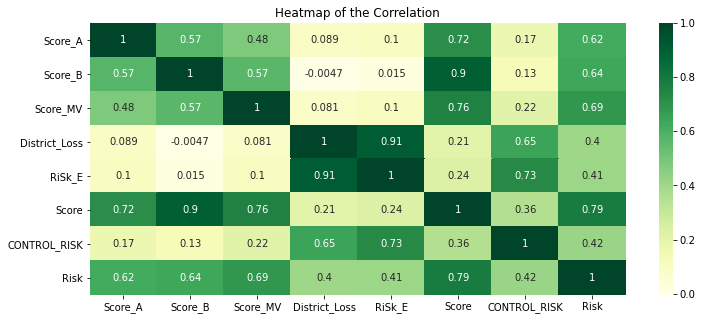

In [9]:
plt.figure(figsize=(12,5))
sns.heatmap(ndata.corr(),cmap="YlGn", annot=True)
plt.title("Heatmap of the Correlation")
plt.show()

In [10]:
### Independent and Dependent Variables
X = ndata.iloc[:,0:7].values
y = ndata.iloc[:,7].values

X.shape, y.shape

((776, 7), (776,))

In [11]:
## Feature Scaling -  Standard Noramal Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[0:3, :]

array([[ 1.42984618, -0.6667522 , -0.56989549, -0.41140172, -0.41041721,
        -0.35250258, -0.38866169],
       [-0.86976136, -0.6667522 , -0.56989549, -0.41140172, -0.41041721,
        -0.81850259, -0.38866169],
       [-0.86976136, -0.6667522 , -0.56989549, -0.41140172, -0.41041721,
        -0.81850259, -0.38866169]])

#### Model Selection Using  GridSearchCV 
Selcting the Best model using the Cross Validation Method

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [13]:
## Logistic Regression
lr_model= LogisticRegression(max_iter=2000,penalty='l2')
lr_par = {"solver":['newton-cg', 'lbfgs','liblinear', 'sag', 'saga']}
logist_spec={"model":lr_model,"params":lr_par}

## SVM Model Specification
svm_model=SVC()
svm_par ={"C":range(1,100,1),"kernel":["linear","rbf","poly","sigmoid"],"gamma":['auto',"scale"]}
svm_spec= {"model":svm_model,"params":svm_par}

## Random Forest Specification
rdf_model =RandomForestClassifier()
rdf_par = {"n_estimators":range(1,101,1),"criterion":["gini", "entropy"]}
rdf_spec={"model":rdf_model,"params":rdf_par }

## Decsion Tree
dt_model = DecisionTreeClassifier()
dt_par ={"criterion":["gini", "entropy"],"splitter":["best","random"],"max_features":["auto", "sqrt", "log2"]}
dt_spec={"model":dt_model,"params":dt_par}


modelpar= {"Logistic":logist_spec,"SVM":svm_spec,"Randomforest":rdf_spec,"decisiontree":dt_spec}
modelpar

{'Logistic': {'model': LogisticRegression(max_iter=2000),
  'params': {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}},
 'SVM': {'model': SVC(),
  'params': {'C': range(1, 100),
   'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
   'gamma': ['auto', 'scale']}},
 'Randomforest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': range(1, 101), 'criterion': ['gini', 'entropy']}},
 'decisiontree': {'model': DecisionTreeClassifier(),
  'params': {'criterion': ['gini', 'entropy'],
   'splitter': ['best', 'random'],
   'max_features': ['auto', 'sqrt', 'log2']}}}

In [14]:
best_model_par={}
best_model_score ={}

for i in modelpar.keys():
    clf= GridSearchCV(modelpar[i]["model"],modelpar[i]["params"],cv=5,return_train_score=False)
    clf.fit(X,y)
    best_model_par[i]= clf.best_params_
    best_model_score[i]= clf.best_score_

In [15]:
## Print Out the Results of the Modelling 

print("Each Algorithm Best Parameters: ",best_model_par,"\n")
print("Each Algorithm Average Accuracy Score: ", best_model_score)

Each Algorithm Best Parameters:  {'Logistic': {'solver': 'newton-cg'}, 'SVM': {'C': 61, 'gamma': 'auto', 'kernel': 'linear'}, 'Randomforest': {'criterion': 'gini', 'n_estimators': 5}, 'decisiontree': {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}} 

Each Algorithm Average Accuracy Score:  {'Logistic': 0.958775847808106, 'SVM': 0.9613564929693963, 'Randomforest': 0.9613482216708024, 'decisiontree': 0.957468982630273}


In [16]:
## Dataframes of each Algorithmn and its Average Accuracy Scores
Model_Acc=  pd.DataFrame(best_model_score.values(), index=best_model_score.keys(),columns=["Accuracy"])
Model_Acc

,Accuracy
Logistic,0.958776
SVM,0.961356
Randomforest,0.961348
decisiontree,0.957469


In [17]:
### The best Model Parameters 
best_model_par["Randomforest"]

{'criterion': 'gini', 'n_estimators': 5}

####  Cross Validation
As confirmation for the GridSerach CV.

In [18]:
svmclassifier = SVC( C=  38, gamma='auto', kernel=  'linear')
val_score= cross_val_score(svmclassifier, X,y, cv=5)
print(val_score)
val_score.mean()

[0.94871795 0.98064516 0.98709677 0.92903226 0.90967742]


0.951033912324235

In [19]:
## Fitting the Model to the Data
svmclassifier = SVC( C=  38, gamma='auto', kernel=  'linear')
svmclassifier.fit(X,y)

SVC(C=38, gamma='auto', kernel='linear')

#### Predictions using the Model

In [21]:
input_val = np.array([ 1.42984618, -0.6667522 , -0.56989549, -0.41140172, -0.41041721,-0.35250258,-0.38866169])
input_val = input_val.reshape(1,-1)

svmclassifier.predict(input_val)

array([0], dtype=int64)

In [22]:
svmclassifier.predict(X[0:10,:])

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [23]:
### Predicitng the Risks for the First 10 Cases in our Dataset
actual_value = pd.DataFrame(y[0:10],columns=["Actual Value"])
predicted_value= pd.DataFrame(svmclassifier.predict(X[0:10,:]),columns=["Predicted Value"])
actual_predicted = pd.concat([actual_value,predicted_value],axis=1)

In [24]:
actual_predicted.transpose()

,0,1,2,3,4,5,6,7,8,9
Actual Value,1,0,0,1,0,0,1,1,1,0
Predicted Value,0,0,0,1,0,0,1,1,1,0


### Thank You